# Showing Pressure and Depth on the same axis
- This worked example shows how to make a plot in python where there are two axes, one showing perssure, and one showing temperature. 
- This could be used to plot melt inclusion pressures, fluid inclusion pressures, or results from Thermobarometry. Thus, to make this example as useful as possible, we load in an excel spreadsheet of pressures as an example

Get spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Other_features/Example_Pressure_data.xlsx 

In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt

## Load the example data

In [2]:
pressures=pd.read_excel('Example_Pressure_data.xlsx', sheet_name='Sheet1')

## Now lets choose a density model to convert pressure to depth

In [3]:
## Lets use the Denlinger_Lerner parameterization first
Depth_DL=pt.convert_pressure_to_depth(P_kbar=pressures['P_kbar'], model='denlinger_lerner')
# Now lets add this to the original dataframe
pressures['Depth_DL']=Depth_DL

## Now lets make a plot to show this data with an axis for depth and an axis for pressure

<Axes: ylabel='Pressure (kbar)'>

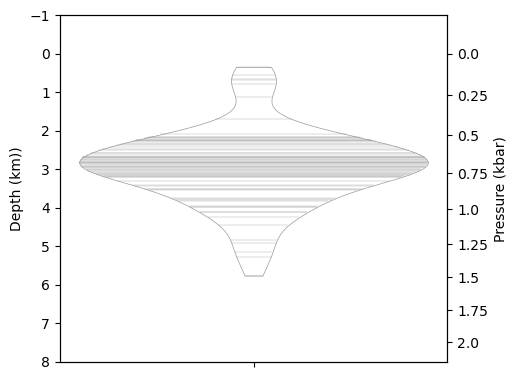

In [4]:
# This line of code sets up the size of the plot, and how many panels there are
fig, ((ax)) = plt.subplots( 1, 1, figsize=(5, 4.5)) 

# Set up an array of the pressures you want on the right hand side of the axis
pressure_ticks = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0])  

# Now, using the function of your choice as above, calculate depth at each of these pressure ticks
depth_ticks = [pt.convert_pressure_to_depth(P_kbar=P, model='denlinger_lerner')[0] for P in pressure_ticks]

# Set the limit on the depth axis, here, from -1 km down to 8 km
ax.set_ylim([8, -1])

# This duplicates the y axis
ax2 = ax.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax2.set_ylim(ax.get_ylim()) 

# Set the ticks on the right y-axis to correspond to the nice pressure values
ax2.set_yticks(depth_ticks)
# This then displays the pressures you selected
ax2.set_yticklabels([P for P in pressure_ticks])

# Set the axes labels
ax2.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km))')

# Now lets plot the data as a violin! The way we have set this up, you need to plot depth, not pressure. As the axes are really depth. 
import seaborn as sns
sns.violinplot(data=pressures['Depth_DL'], cut=0, inner='stick', 
                ax=ax2, width=0.9,  color='white', linewidth=0.5)


## Lets use a different density model instead - A constant crustal density of 2700 kg/m3
- Compare this to the graph above - you can see the pressure ticks get closer toether on the one above because that model predicts the crust gets denser with depth

In [5]:
## Constant Density in crust
Depth_2700=pt.convert_pressure_to_depth(P_kbar=pressures['P_kbar'], crust_dens_kgm3=2700)
# Now lets add this to the original dataframe
pressures['Depth_2700']=Depth_2700


<Axes: ylabel='Pressure (kbar)'>

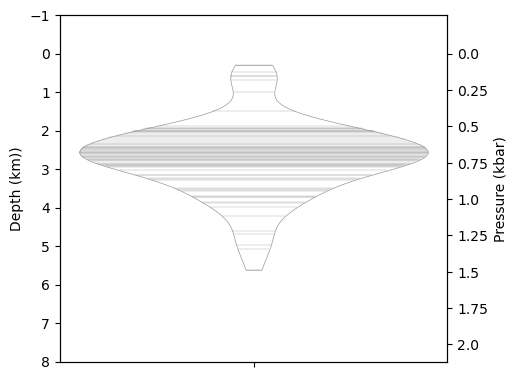

In [6]:
# This line of code sets up the size of the plot, and how many panels there are
fig, ((ax)) = plt.subplots( 1, 1, figsize=(5, 4.5)) 

# Set up an array of the pressures you want on the right hand side of the axis
pressure_ticks = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0])  

# Now, using the function of your choice as above, calculate depth at each of these pressure ticks
depth_ticks = [pt.convert_pressure_to_depth(P_kbar=P, crust_dens_kgm3=2700)[0] for P in pressure_ticks]

# Set the limit on the depth axis, here, from -1 km down to 8 km
ax.set_ylim([8, -1])

# This duplicates the y axis
ax2 = ax.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax2.set_ylim(ax.get_ylim()) 

# Set the ticks on the right y-axis to correspond to the nice pressure values
ax2.set_yticks(depth_ticks)
# This then displays the pressures you selected
ax2.set_yticklabels([P for P in pressure_ticks])

# Set the axes labels
ax2.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km))')

# Now lets plot the data as a violin! The way we have set this up, you need to plot depth, not pressure. As the axes are really depth. 
import seaborn as sns
sns.violinplot(data=pressures['Depth_2700'], cut=0, inner='stick', 
                ax=ax2, width=0.9,  color='white', linewidth=0.5)


## Lets consider a two-step density profile
- This is fairly typical in places where you think you have above and below Moho storage - lets say the crust is 2700 km/m3 above 9km, and 3300 kg/m3 below 9km

In [7]:
## Moho at 10 km. 
d1=10
Depth_2step=pt.convert_pressure_to_depth(P_kbar=pressures['P_kbar'], model='two-step', rho1=2400, d1=d1, rho2=3300)
# Now lets add this to the original dataframe
pressures['Depth_2step']=Depth_2step


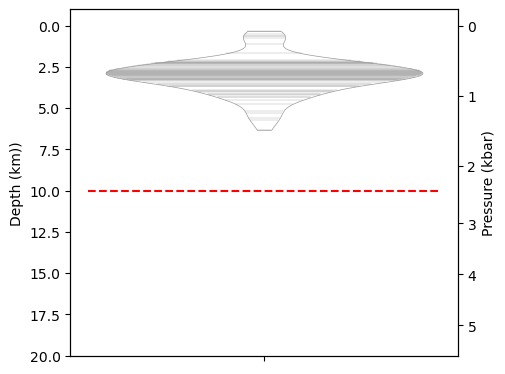

In [8]:
# This line of code sets up the size of the plot, and how many panels there are
fig, ((ax)) = plt.subplots( 1, 1, figsize=(5, 4.5)) 

# Set up an array of the pressures you want on the right hand side of the axis
pressure_ticks = np.array([0, 1, 2, 3, 4, 5])  

# Now, using the function of your choice as above, calculate depth at each of these pressure ticks
depth_ticks = [pt.convert_pressure_to_depth(P_kbar=P, model='two-step', rho1=2400, d1=d1, rho2=3300)[0] for P in pressure_ticks]

# Set the limit on the depth axis, here, from -1 km down to 8 km
ax.set_ylim([20, -1])

# This duplicates the y axis
ax2 = ax.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax2.set_ylim(ax.get_ylim()) 

# Set the ticks on the right y-axis to correspond to the nice pressure values
ax2.set_yticks(depth_ticks)
# This then displays the pressures you selected
ax2.set_yticklabels([P for P in pressure_ticks])

# Set the axes labels
ax2.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km))')


# Now lets plot the data as a violin! The way we have set this up, you need to plot depth, not pressure. As the axes are really depth. 
import seaborn as sns
sns.violinplot(data=pressures['Depth_2step'], cut=0, inner='stick', 
                ax=ax2, width=0.9,  color='white', linewidth=0.5)


# Grab current x-axis limits
xmin, xmax = ax.get_xlim()

# Lets plot our transition depth onto the diagram
ax.hlines(y=d1, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', linewidth=1.5)



## how about a four step density profile! (really showing off now)
- Lets imagine we are working on Kama'ehu volcano, with 1 km of seawater above with a density of 1035 km/m3, then 4 km of vesicular edifice with 2400 kg/m3, then 8 km of crust with 2700, then below that a mantle with a density of 3300 kg/m3

In [9]:
## Transition depths are from below the surface
d1=1 # height of water column
d2=4 + d1 # 4 km of edifice + depth of water
d3=8+d2

rho1=1035
rho2=2400
rho3=2700
rho4=3300
Depth_4step=pt.convert_pressure_to_depth(P_kbar=pressures['P_kbar'], model='four-step', rho1=rho1, rho2=rho2, rho3=rho3, rho4=rho4, d1=d1, d2=d2, d3=d3)
# Now lets add this to the original dataframe
pressures['Depth_4step']=Depth_4step


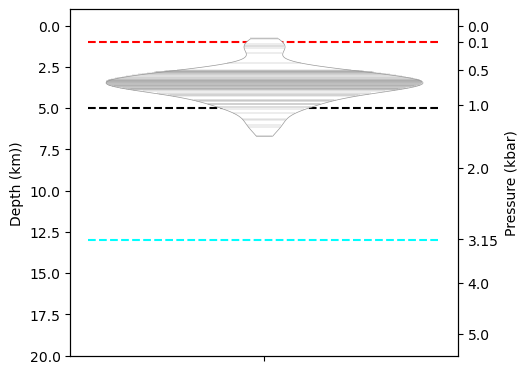

In [10]:
# This line of code sets up the size of the plot, and how many panels there are
fig, ((ax)) = plt.subplots( 1, 1, figsize=(5, 4.5)) 

# Set up an array of the pressures you want on the right hand side of the axis. You can set these to whatever you want!
pressure_ticks = np.array([0, 0.1, 0.5, 1, 2, 3.15, 4, 5])  

# Now, using the function of your choice as above, calculate depth at each of these pressure ticks
depth_ticks = [pt.convert_pressure_to_depth(P_kbar=P,model='four-step', rho1=rho1, rho2=rho2, rho3=rho3, rho4=rho4, d1=d1, d2=d2, d3=d3)[0] for P in pressure_ticks]

# Set the limit on the depth axis, here, from -1 km down to 8 km
ax.set_ylim([20, -1])

# This duplicates the y axis
ax2 = ax.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax2.set_ylim(ax.get_ylim()) 

# Set the ticks on the right y-axis to correspond to the nice pressure values
ax2.set_yticks(depth_ticks)
# This then displays the pressures you selected
ax2.set_yticklabels([P for P in pressure_ticks])

# Set the axes labels
ax2.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km))')

# Now lets plot the data as a violin! The way we have set this up, you need to plot depth, not pressure. As the axes are really depth. 
import seaborn as sns
sns.violinplot(data=pressures['Depth_4step'], cut=0, inner='stick', 
                ax=ax2, width=0.9,  color='white', linewidth=0.5)

# Grab current x-axis limits
xmin, xmax = ax.get_xlim()


# Lets plot our transition depth onto the diagram
ax.hlines(y=d1, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', linewidth=1.5)
ax.hlines(y=d2, xmin=xmin, xmax=xmax, colors='black', linestyles='dashed', linewidth=1.5)
ax.hlines(y=d3, xmin=xmin, xmax=xmax, colors='cyan', linestyles='dashed', linewidth=1.5)



## What if you hate violin diagrams
- I can forgive you, I guess. Lets plot it as a histogram

Text(0.5, 0, 'Population density')

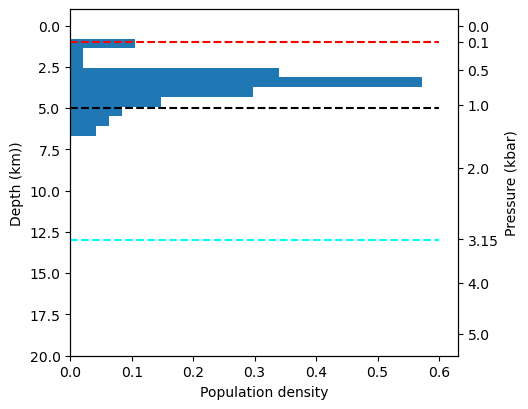

In [11]:
# This line of code sets up the size of the plot, and how many panels there are
fig, ((ax)) = plt.subplots( 1, 1, figsize=(5, 4.5)) 

# Set up an array of the pressures you want on the right hand side of the axis. You can set these to whatever you want!
pressure_ticks = np.array([0, 0.1, 0.5, 1, 2, 3.15, 4, 5])  

# Now, using the function of your choice as above, calculate depth at each of these pressure ticks
depth_ticks = [pt.convert_pressure_to_depth(P_kbar=P,model='four-step', rho1=rho1, rho2=rho2, rho3=rho3, rho4=rho4, d1=d1, d2=d2, d3=d3)[0] for P in pressure_ticks]

# Set the limit on the depth axis, here, from -1 km down to 8 km
ax.set_ylim([20, -1])

# This duplicates the y axis
ax2 = ax.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax2.set_ylim(ax.get_ylim()) 

# Set the ticks on the right y-axis to correspond to the nice pressure values
ax2.set_yticks(depth_ticks)
# This then displays the pressures you selected
ax2.set_yticklabels([P for P in pressure_ticks])

# Set the axes labels
ax2.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km))')

# Now lets plot the data as a histogram. The way we have set this up, you need to plot depth, not pressure. As the axes are really depth. 
ax.hist(pressures['Depth_4step'], orientation='horizontal', density=True)

# Grab current x-axis limits
xmin, xmax = ax.get_xlim()


# Lets plot our transition depth onto the diagram
ax.hlines(y=d1, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', linewidth=1.5)
ax.hlines(y=d2, xmin=xmin, xmax=xmax, colors='black', linestyles='dashed', linewidth=1.5)
ax.hlines(y=d3, xmin=xmin, xmax=xmax, colors='cyan', linestyles='dashed', linewidth=1.5)

ax.set_xlabel('Population density')

## Or perhaps you have Forsterite contents you want to plot against

Text(0.5, 0, 'Olivine Fo content')

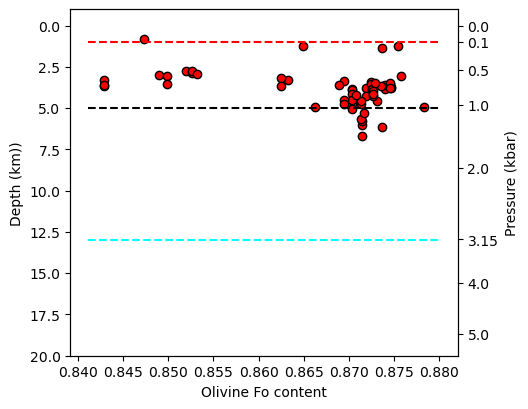

In [12]:
# This line of code sets up the size of the plot, and how many panels there are
fig, ((ax)) = plt.subplots( 1, 1, figsize=(5, 4.5)) 

# Set up an array of the pressures you want on the right hand side of the axis. You can set these to whatever you want!
pressure_ticks = np.array([0, 0.1, 0.5, 1, 2, 3.15, 4, 5])  

# Now, using the function of your choice as above, calculate depth at each of these pressure ticks
depth_ticks = [pt.convert_pressure_to_depth(P_kbar=P,model='four-step', rho1=rho1, rho2=rho2, rho3=rho3, rho4=rho4, d1=d1, d2=d2, d3=d3)[0] for P in pressure_ticks]

# Set the limit on the depth axis, here, from -1 km down to 8 km
ax.set_ylim([20, -1])

# This duplicates the y axis
ax2 = ax.twinx()

# This ensures that what will be the pressure axis shares the same y lim. This may seem wrong, but its because the right hand axis is still in depth coordinates, that you just calculated above
# with depth_ticks, but the labels are pressure. Clever, right!
ax2.set_ylim(ax.get_ylim()) 

# Set the ticks on the right y-axis to correspond to the nice pressure values
ax2.set_yticks(depth_ticks)
# This then displays the pressures you selected
ax2.set_yticklabels([P for P in pressure_ticks])

# Set the axes labels
ax2.set_ylabel('Pressure (kbar)')
ax.set_ylabel('Depth (km))')


# Now lets plot a scatter plot
import seaborn as sns
ax.plot(pressures['Fo'], pressures['Depth_4step'], 
        'ok', mfc='red')

# Grab current x-axis limits
xmin, xmax = ax.get_xlim()


# Lets plot our transition depth onto the diagram
ax.hlines(y=d1, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', linewidth=1.5)
ax.hlines(y=d2, xmin=xmin, xmax=xmax, colors='black', linestyles='dashed', linewidth=1.5)
ax.hlines(y=d3, xmin=xmin, xmax=xmax, colors='cyan', linestyles='dashed', linewidth=1.5)



ax.set_xlabel('Olivine Fo content')